In [31]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [32]:
bonds = dict()

At there we consider the Sherrington-Kirkpatrick (SK) spin glass, which is an infinite-range model. Now the spins sit on the site of a complete graph, which the Hamiltonian is modified as:
$$
\mathcal{H} = - \frac{1}{\sqrt{N}}\sum_{i<j}J_{i,j}S_iS_j
$$
This is a mean-field model, which we hope it can somehow reflect the short-range model when dimension goes to infinity.

In [33]:
def get_bound(index1, index2, bonds):
    bond = frozenset({index1,index2})
    if bond in bonds:
        return bonds[bond]
    else:
        bonds[bond] = np.random.standard_normal()
        return bonds[bond]

In [34]:
def get_energy(spin, spin_index, neighbor_index, S):
    energy = 0
    for neighbor in neighbor_index:
        bond = get_bound(spin_index, neighbor, bonds)
        energy = energy + bond*spin*S[neighbor]
    return energy

In [35]:
def get_neighbor(i,S):
    return [index for index in range(len(S)) if index != i]


In [45]:
def overlap(S1,S2,N):
    return np.sum(S1*S2)/N

def sweep(S,N):
    sweep = 0
    while sweep < N:
        indices = random.randrange(len(S))
        spin = S[indices]
        neighbor_index = get_neighbor(indices,S)
        beforeE = get_energy(spin, indices, neighbor_index, S)
        afterE = get_energy(-spin, indices, neighbor_index, S)
        deltaE = afterE - beforeE
        if deltaE > 0:
            S[indices] = -spin
        sweep = sweep+1

In [37]:
def is_active(index, S):
    spin = S[index]
    neighbor_index = get_neighbor(index,S)
    beforeE = get_energy(spin, index, neighbor_index, S)
    afterE = get_energy(-spin, index, neighbor_index, S)
    deltaE = afterE - beforeE
    return deltaE > 0

In [48]:
def get_active(S):
    active_indices =[]
    for i in range(len(S)):
        if is_active(i, S):
            active_indices.append(i)
    return active_indices

In [39]:
import random

def kineticMonteCarlo(S,L,active_list):
    l = len(active_list)
    if l == 0:
        return 0
    t = 1/l
    index = random.choice(active_list)
    spin = S[tuple(index)]
    neighbor_index = get_neighbor(np.asarray(index),L)
    beforeE = get_energy(spin, index, neighbor_index, S)
    afterE = get_energy(-spin, index, neighbor_index, S)
    deltaE = afterE - beforeE
    if deltaE > 0:
        S[tuple(index)] = -spin
        active_list.remove(tuple(index))
        for nspin in neighbor_index:
            if is_active(nspin,S,L):
                if not (tuple(nspin) in active_list):
                    active_list.append(tuple(nspin))
            else:
                if (tuple(nspin) in active_list):
                    active_list.remove(tuple(nspin))
    return t

In [73]:
N = 100
config = np.random.choice([-1, 1], size = N)
S1 = config.copy()
S2 = config.copy()
overlap(S1,S2,N)

1.0

In [74]:
survival1 = 0
survival2 = 0
while len(get_active(S1)) != 0:
    sweep(S1,N)
    survival1 = survival1 + 1
while len(get_active(S2)) != 0:
    sweep(S2,N)
    survival2 = survival2 + 1

In [87]:
overlap_SK = []
for i in range(100):
    N = 100
    config = np.random.choice([-1, 1], size = N)
    S1 = config.copy()
    S2 = config.copy()
    survival1 = 0
    survival2 = 0
    while len(get_active(S1)) != 0:
        sweep(S1,N)
        survival1 = survival1 + 1
    while len(get_active(S2)) != 0:
        sweep(S2,N)
        survival2 = survival2 + 1
    overlap_SK.append(overlap(S1,S2,N))

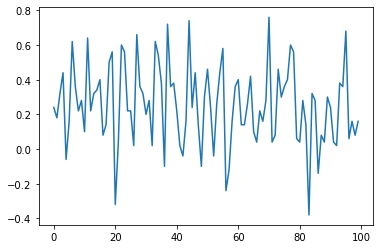

In [88]:
plt.plot(overlap_SK)

In [89]:
sum(overlap_SK)/len(overlap_SK)

0.2527999999999999